# Projet 5 : Segmentez des clients d'un site e-commerce


Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions  que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.


# Maintenance

<a id="0"></a> <br>
# Table of Contents 

1. [Premières observations](#1)
2. [Création des dataframe](#2)
3. [Analyse de la stabilité du modèle](#3)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import fonctions as fc

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
# Paramètres d'affichage
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

# <a id="1"></a> 1. Premières observations

In [3]:
data = pd.read_csv('data_cleaned_all.csv')

In [4]:
data.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_t

In [5]:
col_date = ['order_purchase_timestamp',
            'order_approved_at', 'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date', 'shipping_limit_date']

data[col_date] = data[col_date].apply(pd.to_datetime,
                                      format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
col_cat = ['order_status', 'customer_zip_code_prefix', 'customer_city',
           'customer_state', 'payment_type', 'seller_zip_code_prefix',
           'seller_city', 'seller_state', 'product_category_name_english']


data[col_cat] = data[col_cat].astype('category')

In [7]:
data.dtypes

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix               category
customer_city                          category
customer_state                         category
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                           category
payment_installments                    

Modèle sélectionné lors de la modélisation: 

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0)

# <a id="2"></a> 2. Création des dataframe

In [9]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,None,None,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
2,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
3,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1.0,credit_card,7.0,140.61,251191809e37c1cffc16865947c18a4d,3.0,None,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
4,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1.0,credit_card,10.0,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,None,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture


In [10]:
date_max = data['order_purchase_timestamp'].dt.date.max()
date_min = data['order_purchase_timestamp'].dt.date.min()
print('Le data set va de {} à {}, soit {} jours.'
      .format(date_min, date_max, (date_max-date_min).days))

Le data set va de 2016-10-03 à 2018-08-29, soit 695 jours.


In [12]:
def df_periode(df, delta):
    '''Prend un dataframe et un intervalle de temps,
    calcul une date maximale et retourne le dataframe dont
    les valeurs sont inférieures à cette date.
    Keyword arguments:
    df -- le dataframe
    delta -- intervalle de temps

    return : le dataframe réduit.
    '''

    date_min = df['order_purchase_timestamp'].dt.date.min()

    week = 52 + (delta * 2)

    date_max = date_min + dt.timedelta(weeks=week)

    df_delta = df[(df['order_purchase_timestamp'].dt.date >= date_min) &
                  (df['order_purchase_timestamp'].dt.date <= date_max)]

    return df_delta

On commence par réaliser le kmeans sur la période initiale (déterminée à 1 an de 2016-10 à 2017-10).

In [59]:
col_select = ['time_since_last_order', 'mean_shipping_time', 'nb_total_order',
              'nb_total_item', 'total_price', 'mean_freight_value',
              'mean_payment_installments', 'mean_review_score']

In [60]:
def model_init(data, col, delta):
    '''Créer le dataframe initial et applique la modélisation
    sélectionnée dans le notebook de modélisation.
    Keyword arguments:
    data -- le dataframe
    col -- colonnes à selectionner dans le dataframe
    delta -- intervalle de temps

    return : le scaler et le model.
    '''

    # création du df
    df_init = df_periode(data, delta)
    df_0 = fc.df_agg_cust(df_init)
    df_0 = df_0[col]

    # preprocessing
    col_quanti = df_0.select_dtypes(['int64', 'float64']).columns
    col_quali = df_0.select_dtypes(['category', 'object', 'bool']).columns

    minmax_scale = MinMaxScaler()
    ohe = OneHotEncoder()
    preprocessor = ColumnTransformer(transformers=[
        ('quanti', minmax_scale, col_quanti),
        ('quali', ohe, col_quali)])

    scale_0 = preprocessor.fit(df_0)
    df_0_scaled = scale_0.transform(df_0)

    # modélisation
    kmeans.fit(df_0_scaled)
    df_0['Cluster'] = kmeans.predict(df_0_scaled)

    return scale_0, kmeans

In [ ]:
scale_0, kmeans = model_init(data, col_select, 0)

On reproduit ensuite le cheminement pour chaque période (période précédente + 15 jours). 

On calcule à chaque période l'ARI (Adjusted Rand Index). L'indice Rand ajusté (ARI) est une mesure de la similarité entre deux clustering de données. Il s'agit d'une correction du Rand Index (RI), qui est une mesure basique de similarité entre deux clusterings, mais il a l'inconvénient d'être sensible au hasard. 

In [65]:
def model_periode(data, col, k, p_min, p_max, scale, model_initial):
    '''Calcule le score ARI entre chaque période.
    Keyword arguments:
    data -- le dataframe
    col -- colonnes à selectionner dans le dataframe
    k -- nombre de cluster pour le Kmeans
    p_min -- nombre minimal de la période
    p_max -- nombre maximal de la période
    scale -- scaler du modèle initial
    model_initial -- modèle initial

    return : les scores ARI pour chaque période.
    '''

    ARI = []

    for p in range(p_min, p_max+1):

        # Création du dataframe à chaque nouvelle période
        df_p = df_periode(data, p)
        df_p = fc.df_agg_cust(df_p)
        df_p = df_p[col]

        # Preprocessing
        col_quanti = df_p.select_dtypes(['int64', 'float64']).columns
        col_quali = df_p.select_dtypes(['category', 'object', 'bool']).columns

        minmax_scale = MinMaxScaler()
        ohe = OneHotEncoder()
        preprocessor = ColumnTransformer(transformers=[
            ('quanti', minmax_scale, col_quanti),
            ('quali', ohe, col_quali)])

        df_p_scaled = preprocessor.fit_transform(df_p)

        # Prédiction avec le kmeans initial
        df_p_scaled_init = scale.transform(df_p)
        df_p['Cluster_initial'] = model_initial.predict(df_p_scaled_init)

        # Modélisation
        kmeans_period = KMeans(n_clusters=k, random_state=0)

        kmeans_period.fit(df_p_scaled)
        df_p['Cluster'] = kmeans_period.predict(df_p_scaled)

        # Calcul de l'ARI
        score_p = adjusted_rand_score(df_p['Cluster'], df_p['Cluster_initial'])
        ARI.append([p, score_p])

    return ARI

In [ ]:
ARI = model_periode(data, col_select, 4, 0, 24, scale_0, kmeans)

In [67]:
print('Voici les scores ARI pour chaque période :')
ARI

Voici les scores ARI pour chaque période :


[[0, 1.0],
 [1, 0.9387583906046382],
 [2, 0.8940603136958003],
 [3, 0.8518711965749918],
 [4, 0.8347358590183448],
 [5, 0.8109530511680637],
 [6, 0.7478145565960183],
 [7, 0.7134105938265526],
 [8, 0.6909731341840742],
 [9, 0.6714850824588392],
 [10, 0.6501562428771617],
 [11, 0.6345409778737707],
 [12, 0.61167777735129],
 [13, 0.5724884390059319],
 [14, 0.528709392550536],
 [15, 0.5158932010939731],
 [16, 0.49744452712160614],
 [17, 0.4570290729985937],
 [18, 0.4359057378680079],
 [19, 0.4158270502072097],
 [20, 0.39502793525755764],
 [21, 0.3781518142445045],
 [22, 0.35924345047534456],
 [23, 0.3491468590094422],
 [24, 0.3363145533066207]]

Nous allons désormais afficher les différents scores ARI sur un graphe afin d'avoir une meilleure visualisation.

In [75]:
def plot_ari(ARI):
    '''Affiche le score ARI en fonction de chaque période.
    Keyword arguments:
    ARI -- scores ARI de chaque période.
    '''

    df_ARI = pd.DataFrame(ARI, columns=['Période', 'Score'])

    plt.subplots(figsize=(15, 7))

    sns.lineplot(x=df_ARI['Période']*2,
                 y=df_ARI['Score']*100,
                 data=df_ARI, marker='o')

    for line in range(0, df_ARI.shape[0]):
        plt.text(x=df_ARI.Période[line]*2+0.3,
                 y=df_ARI.Score[line]*100,
                 s=(df_ARI.Score[line]*100).round(2))

    plt.axhline(y=80, color='gray', linestyle='--')

    plt.xticks(range(0, 50, 2))

    plt.xlabel('Semaines')
    plt.ylabel('Score ARI (en %)')

    plt.grid()
    plt.title("Évolution de l'ARI (Adjusted Rand Index) au cours du temps")
    plt.show()

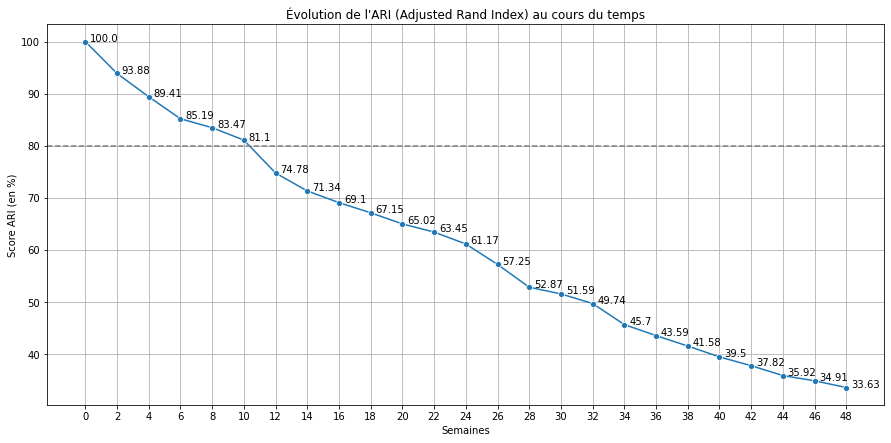

In [58]:
plot_ari(ARI)

On constate qu'après 10 semaines (soit 2,5 mois) le score ARI diminue assez fortement et passe sous le seuil de 80%. Nous pouvons donc supposer que notre modèle de clustering doit être mis à jour après 2,5 mois. 

Nous allons vérifier cela en entraînant le modèle sur un data set initial plus important et en observant le score ARI sur les derniers mois restants. 

In [ ]:
scale_0, kmeans = model_init(data, col_select, 8)

In [ ]:
ARI = model_periode(data, col_select, 4, 8, 24, scale_0, kmeans)

In [70]:
print('Voici les scores ARI pour chaque période :')
ARI

Voici les scores ARI pour chaque période :


[[8, 1.0],
 [9, 0.9564937992157004],
 [10, 0.9196286170979502],
 [11, 0.8868922595300005],
 [12, 0.8392883779350228],
 [13, 0.8119683828899049],
 [14, 0.7794140301224192],
 [15, 0.7655519894205002],
 [16, 0.7408405444050752],
 [17, 0.6669225527202942],
 [18, 0.6204982893823165],
 [19, 0.5974231892070315],
 [20, 0.5631982181513797],
 [21, 0.5313563203237438],
 [22, 0.5069758177408157],
 [23, 0.4928237857957082],
 [24, 0.47818983551810357]]

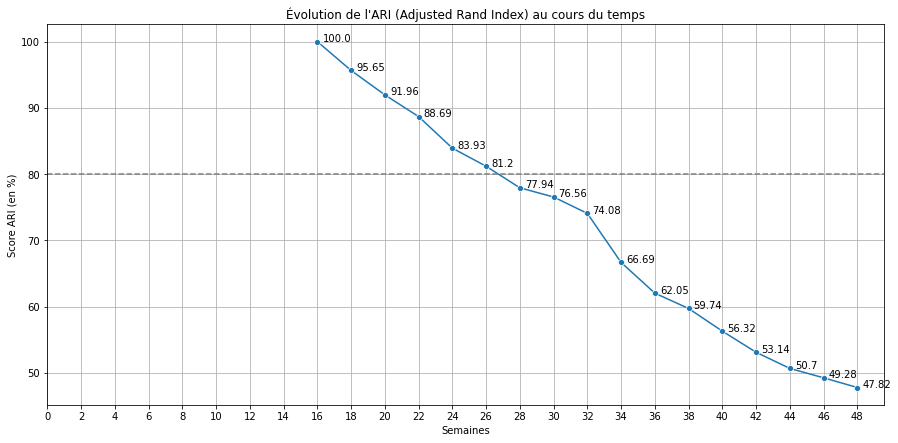

In [76]:
plot_ari(ARI)

On constate une nouvelle fois que notre modèle doit être mis à jour après 10 semaines (soit 2,5 mois), peu importe la période initialement utilisée pour entraîner le modèle.